In [1]:
using LinearAlgebra
using SparseArrays
using Plots
using Krylov

In [2]:
function my_gmres(A, b, m)
    n = length(b)
    Q = zeros(n, m+1)
    Q[:,1] = b/norm(b)
    H = zeros(m+1, m)

    # Initial solution is zero.
    x = 0
    residual = [norm(b); zeros(m)]

    for j in 1:m
        # Next step of Arnoldi iteration.
        v = A*Q[:, j]
        for i in 1:j
            H[i, j] = dot(Q[:,i],v )
            v -= H[i, j]*Q[:, i]
        end
        H[j+1, j] = norm(v)
        Q[:, j+1] = v/H[j+1, j]

        # Solve the minimum residual problem.
        r = [norm(b); zeros(j)]
        z = H[1:j+1, 1:j] \ r
        x = Q[:, 1:j]*z
        residual[j+1] = norm( A*x - b )
    end
    return x, residual
end

my_gmres (generic function with 1 method)

In [61]:
function poisson(n)
    D = spdiagm(-1=>fill(-1, n-1), 0=>fill(2, n), 1=>fill(-1, n-1))
    # kron(A, B) = Σ Σ A[i, j] * B
    return kron(D, I(n)) + kron(I(n), D)
end


poisson (generic function with 1 method)

In [83]:
itmax = 120
rtol = 1e-8
d = 50
A = Float64(d^2) * poisson(d);
n = size(A, 1)
b = ones(n) # This needs to be a vector
rest = [itmax 20 40 60];

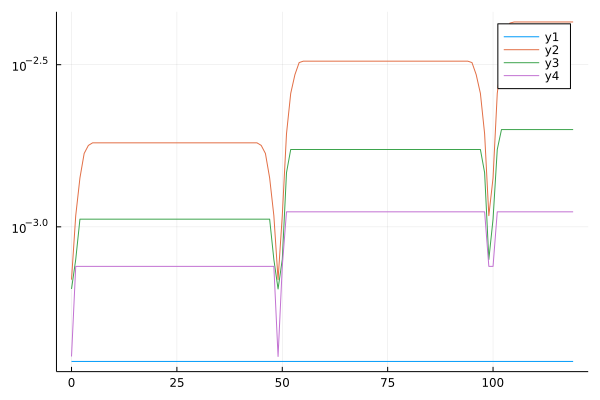

In [85]:
plot([j for j in 0:itmax-1], 
     [gmres(A, 
            b, 
            restart=true, 
            memory=rest[i], 
            rtol=rtol, 
            itmax=Int(itmax/rest[i])
            )[1][1:itmax]
      for i in 1:size(rest, 2)
     ], 
     yaxis=:log
    )

In [86]:
i = 2
gmres(A, 
      b, 
      restart=true, 
      memory=rest[i], 
      rtol=rtol, 
      itmax=Int(itmax/rest[i])
     )

([0.0006875030267956791, 0.0010827262203656832, 0.0014159265366537968, 0.0016840700895521517, 0.0017830966718391157, 0.0018159412946626358, 0.0018159412946626358, 0.0018159412946626358, 0.0018159412946626358, 0.0018159412946626358  …  0.001815941294662636, 0.001815941294662636, 0.001815941294662636, 0.001815941294662636, 0.001815941294662636, 0.0017830966718391159, 0.0016840700895521521, 0.0014159265366537974, 0.0010827262203656836, 0.0006875030267956782], Simple stats
 niter: 6
 solved: false
 inconsistent: false
 residuals: []
 Aresiduals: []
 κ₂(A): []
 status: maximum number of iterations exceeded
)

In [88]:
i = 2
gmres(A, 
      b
     )

([0.0009283998408956133, 0.001656799679941963, 0.002264259539572782, 0.0027879594849472282, 0.003248250624620337, 0.003657670033547448, 0.004024640116400534, 0.004355184934642363, 0.004653815321905329, 0.0049240265985366505  …  0.0049240265985366375, 0.0046538153219053136, 0.004355184934642343, 0.004024640116400512, 0.0036576700335474396, 0.0032482506246203375, 0.0027879594849472256, 0.002264259539572764, 0.0016567996799419506, 0.0009283998408956075], Simple stats
 niter: 92
 solved: true
 inconsistent: false
 residuals: []
 Aresiduals: []
 κ₂(A): []
 status: solution good enough given atol and rtol
)